<a href="https://colab.research.google.com/github/tanvi-1706/medical-report-screening-using-NLP/blob/main/medical_report_screenign_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('symptomdiseasedataset.csv')

In [ ]:
df.head()

,Diseasecode,Symptom
0,308,I have been having migraines and headaches. I ...
1,35,I have asthma and I get wheezing and breathing...
2,798,Signs and symptoms of primary ovarian insuffic...
3,149,"cough,high_fever,breathlessness,family_history..."
4,596,"chills,vomiting,high_fever,sweating,headache,n..."


In [ ]:
df.shape


(5634, 2)

In [ ]:
df['Diseasecode'].value_counts()


186     151
35      143
234     142
1047    140
766     138
       ... 
319       1
977       1
891       1
357       1
910       1
Name: Diseasecode, Length: 866, dtype: int64

In [ ]:
counts = df['Diseasecode'].value_counts()
labels = df['Diseasecode'].unique()


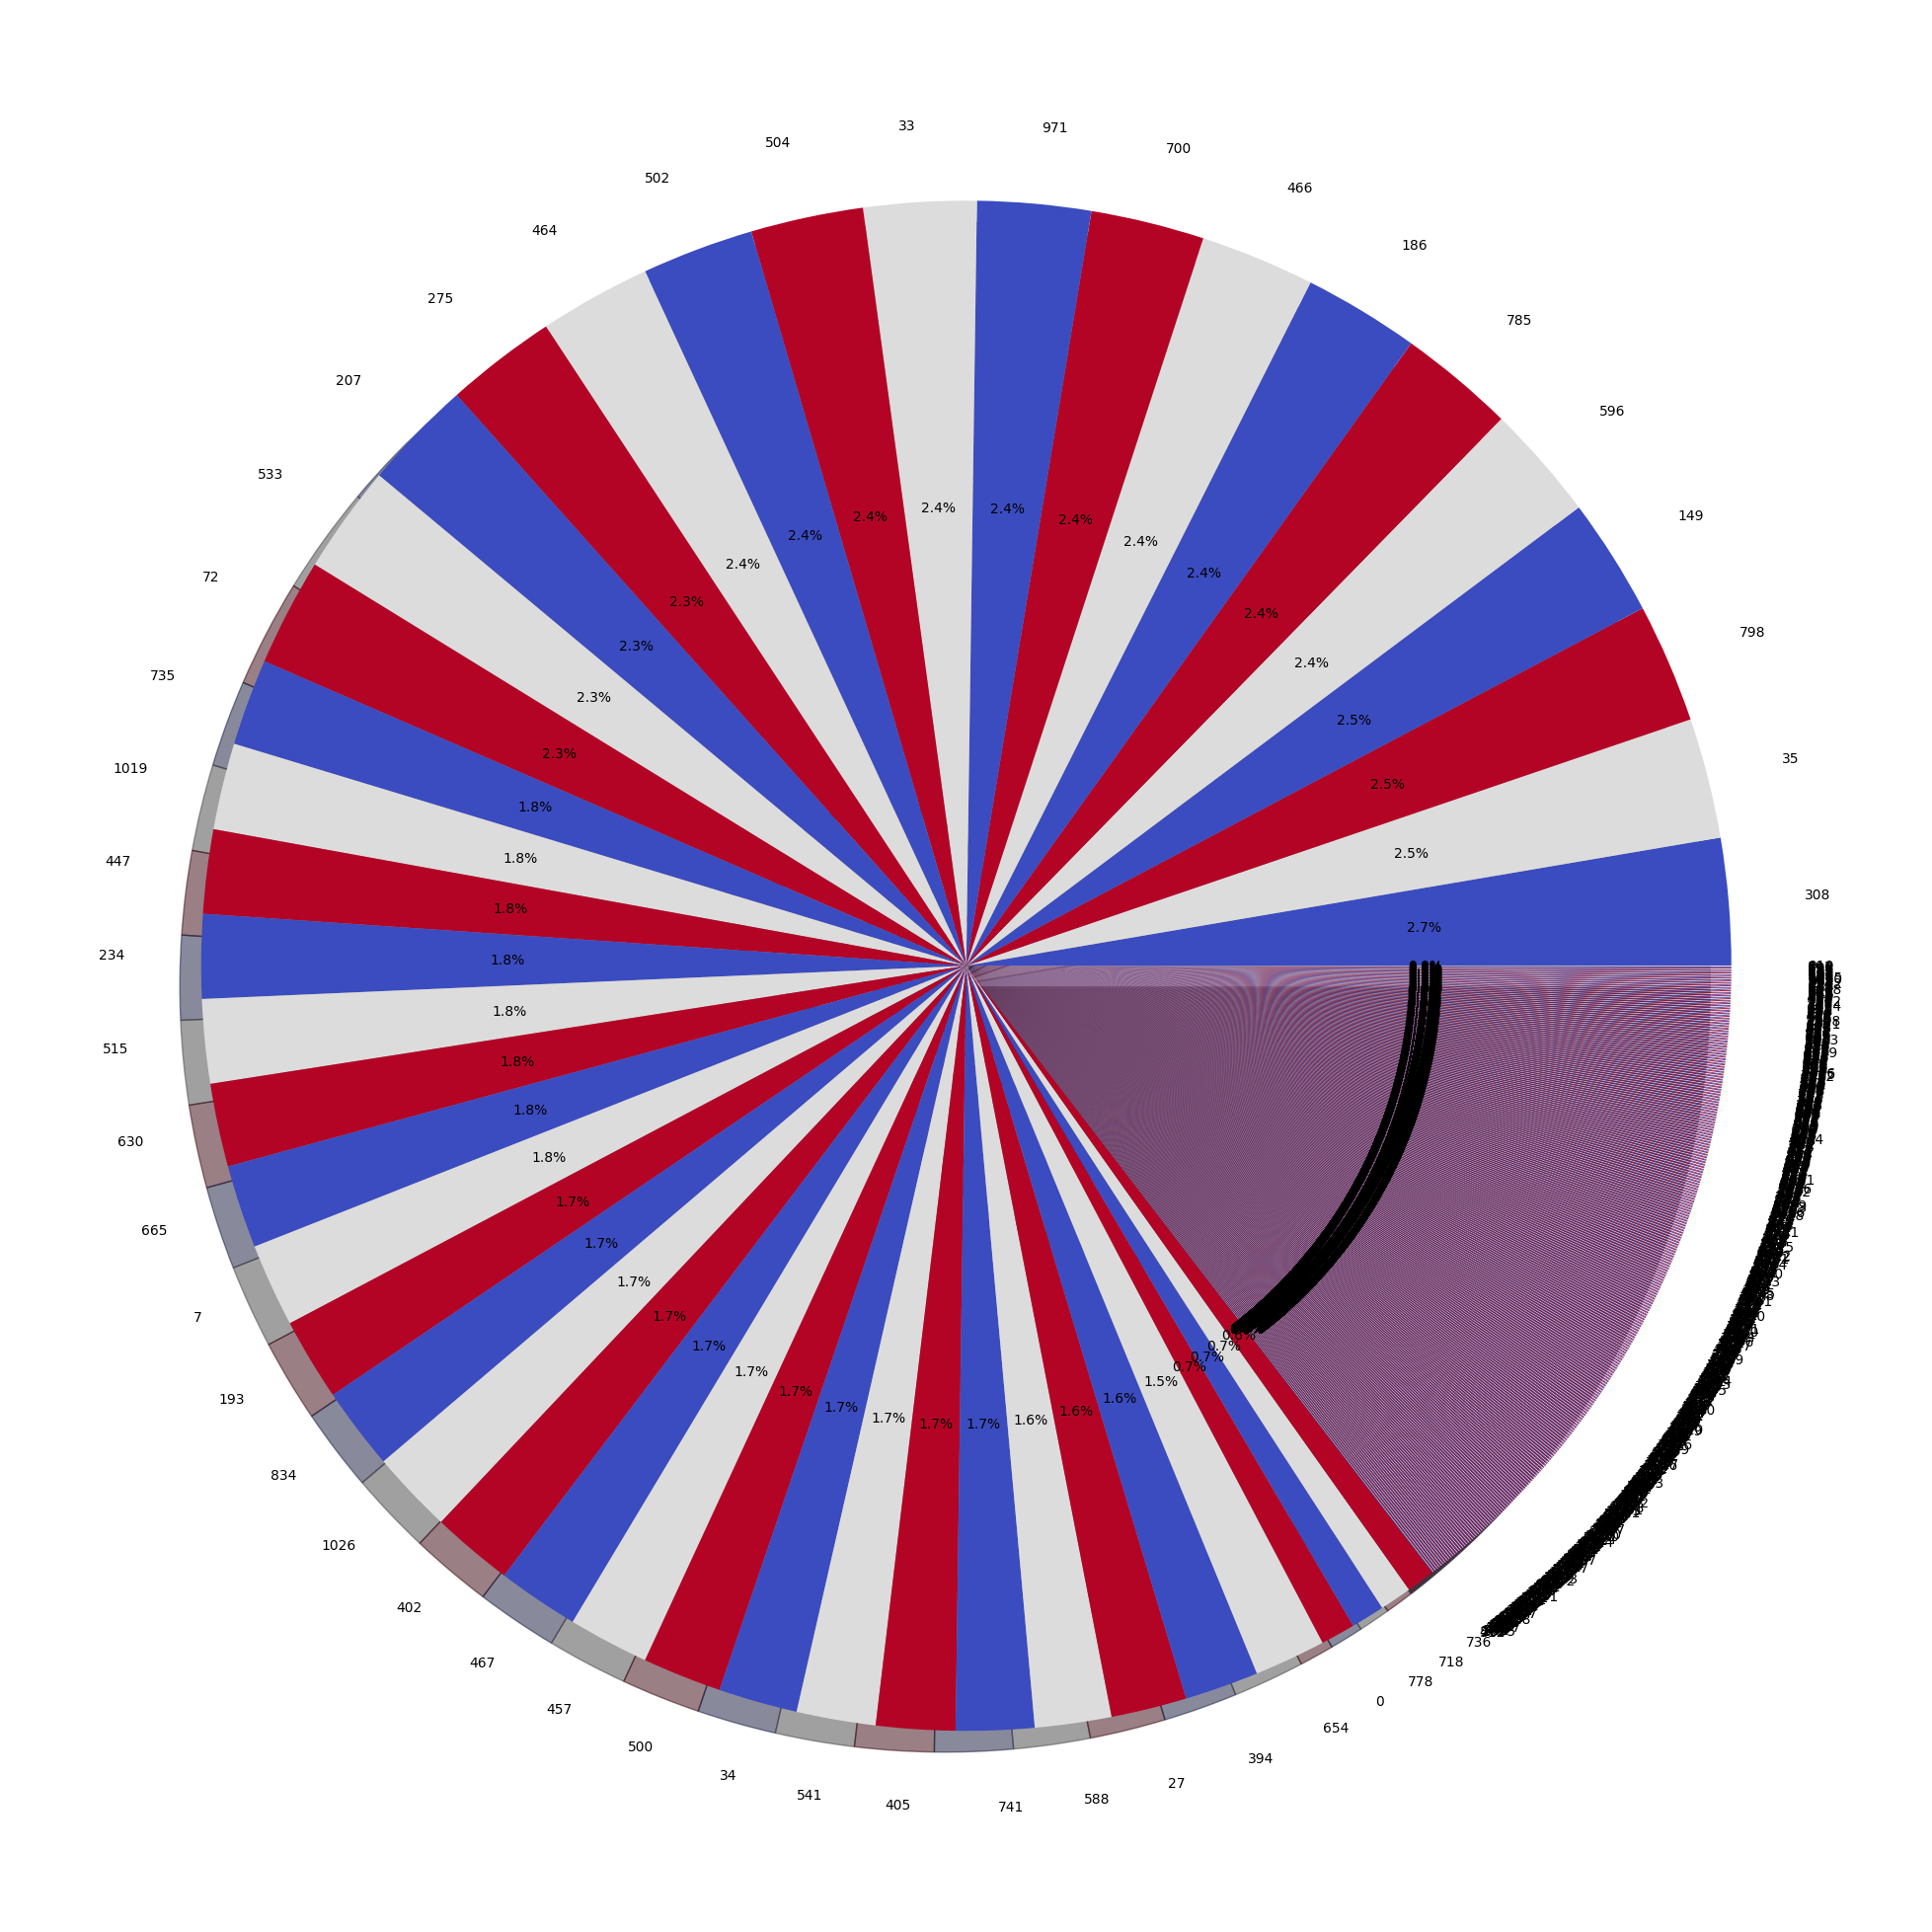

In [ ]:
plt.figure(figsize=(25,40))
plt.pie(counts,labels = labels, autopct = '%1.1f%%', shadow = True, colors = plt.cm.coolwarm(np.linspace(0,1,3)) )
plt.show()

In [ ]:
df['Diseasecode'][0]

308

In [ ]:
df['Symptom'][0]

"I have been having migraines and headaches. I can't sleep. My whole body is shaking and shivering. I feel dizzy sometimes."

In [ ]:
import re

In [ ]:
def CleanData(txt):
  cleanTxt = re.sub('http\S+\s',' ',txt)
  cleanTxt = re.sub('@\S+',' ',cleanTxt)
  cleanTxt = re.sub('#\S+\s',' ',cleanTxt)
  cleanTxt = re.sub('RT|cc',' ',cleanTxt)
  cleanTxt = re.sub('[%s]' % re.escape("""#$%&'(*+,-_-=<>/[]^{}|\)~`"""),' ',cleanTxt)
  cleanTxt = re.sub(r'[^\x00-\x7f]',' ',cleanTxt)
  cleanTxt = re.sub('\s+',' ',cleanTxt)
  return cleanTxt

In [ ]:
df['Symptom'] = df['Symptom'].apply(lambda x: CleanData(x))

In [ ]:
df['Symptom'][0]

'I have been having migraines and headaches. I can t sleep. My whole body is shaking and shivering. I feel dizzy sometimes.'

In [ ]:
df.head()

,Diseasecode,Symptom
0,308,I have been having migraines and headaches. I ...
1,35,I have asthma and I get wheezing and breathing...
2,798,Signs and symptoms of primary ovarian insuffic...
3,149,cough high fever breathlessness family history...
4,596,chills vomiting high fever sweating headache n...


In [ ]:
print(df['Diseasecode'].unique())

[ 308   35  798  149  596  785  186  466  700  971   33  504  502  464
  275  207  533   72  735 1019  447  234  515  630  665    7  193  834
 1026  402  467  457  500   34  541  405  741  588   27  394  654    0
  778  718  736  412  577  287 1035  262  944  468  465  297 1067  766
  822  501  108  316  374  756  171  801  285  561  511 1018  625  395
  639  552  226  406  931  264  133 1047  355   22  403  488  284  761
  765  529  173  440  740  235  604  391  358  556  106  393  768  345
  510  221  671  212  750  754  922  598 1071  676  582   70  119  775
   68  567  532  205  437  523   88  912  759  631  505  237  796  889
  208  603  657  435  820 1062   52  429 1003  719  339  990  863  691
  260  423  655   91  302  667  959  729  732  697 1007  122  991  948
  272  163  616  612  309  477  686  256 1037  290  520   38  670  493
  662  202  304  220  342   66  132  224  855   81  651  525  458  181
  164  152  240  303  125  998  906 1014  197  441  421 1024  947  770
  227 

In [ ]:
#vectorization
df['Symptom'][0]

'I have been having migraines and headaches. I can t sleep. My whole body is shaking and shivering. I feel dizzy sometimes.'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')

tfidf.fit(df['Symptom'])
requiredtxt = tfidf.transform(df['Symptom'])

In [ ]:
df

,Diseasecode,Symptom
0,308,I have been having migraines and headaches. I ...
1,35,I have asthma and I get wheezing and breathing...
2,798,Signs and symptoms of primary ovarian insuffic...
3,149,cough high fever breathlessness family history...
4,596,chills vomiting high fever sweating headache n...
...,...,...
5629,394,itching skin rash dischromic patches
5630,630,acidity headache blurred and distorted vision ...
5631,447,vomiting breathlessness sweating chest pain
5632,735,vomiting indigestion loss of appetite abdomina...


In [ ]:
requiredtxt

<5634x7388 sparse matrix of type '<class 'numpy.float64'>'
	with 108854 stored elements in Compressed Sparse Row format>

In [ ]:
#splitting
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(requiredtxt, df['Diseasecode'], test_size = 0.33, random_state = 42)

In [ ]:
xtrain.shape

(3774, 7388)

In [ ]:
xtest.shape

(1860, 7388)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
clf = KNeighborsClassifier()
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)
print(ypred)
print(accuracy_score(ytest,ypred))

[  27  412  465 ... 1047  822   33]
0.8139784946236559


In [ ]:
#PREDICTION SYS
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [ ]:
mySymptom = """ """

mySymptom1 = """I am 25 year old and i have vomiting, sweating and chest pain"""

In [ ]:
import pickle
clf = pickle.load(open('clf.pkl','rb'))
cleaned_Symptom = CleanData(mySymptom1)
input_features = tfidf.transform([cleaned_Symptom])
prediction_id = clf.predict(input_features)[0]
print("Predicted Diseasecode:", prediction_id)

Predicted Diseasecode: 447
